# Campaña de Marketing Bancario

# Paso 1: Planteamiento del problema y Recopilación de datos

* Comprensión empresarial

    Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

* Descripción del problema
    El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor     probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

In [3]:
# Librerias a utilizar

import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
from fitter import Fitter, get_common_distributions
from scipy.stats import lognorm

Carga de Data

In [4]:
# URL del archivo CSV
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

# Leer el archivo CSV desde la URL
df_bank = pd.read_csv(url)
df_bank_inicial = pd.read_csv(url)
df_bank = pd.read_csv(url, delimiter=';')

# Ruta de destino
ruta_destino = '/workspaces/Ejercicio-de-Regresion-Logistica/data/raw/bank-marketing-campaign-data.csv'
ruta_destino_i = '/workspaces/Ejercicio-de-Regresion-Logistica/data/raw/bank-marketing-campaign-data_inicial.csv'

# Crear el directorio si no existe
os.makedirs(os.path.dirname(ruta_destino), exist_ok=True)

# Guardar el DataFrame en la ruta especificada con una copia de la data original
df_bank.to_csv(ruta_destino, index=False)
df_bank_inicial.to_csv(ruta_destino_i, index=False)

print(f'Archivo guardado en: {ruta_destino}')


Archivo guardado en: /workspaces/Ejercicio-de-Regresion-Logistica/data/raw/bank-marketing-campaign-data.csv


# Paso 2: Exploracion y Limpieza de Datos

In [5]:
df_bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# Revision valores nulos
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# Revision duplicados

duplicados=df_bank[df_bank.duplicated()]
duplicados

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [10]:
# Eliminamos datos duplicados

df_bank.drop_duplicates(inplace=True)

In [11]:
duplicados=df_bank[df_bank.duplicated()]
duplicados

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


* El DataSet tiene 41188 registros, 21 columnas con la siguiente distribucion y dtypes: 11 tipo object, 5 tipo int64 y 5 float64 incluida la columna de la clase a predecir. 
* No se detectaron datos o registros nulos.
* Se encontraron filas duplicadas y se procede a eliminarlas.

# Paso 3: Análisis de variables univariante

Variables Categóricas

In [12]:
# Variables tipo object
s = (df_bank.dtypes == 'object')
object_colums = list(s[s].index)

print("Categorical variables:")
print(object_colums)

Categorical variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


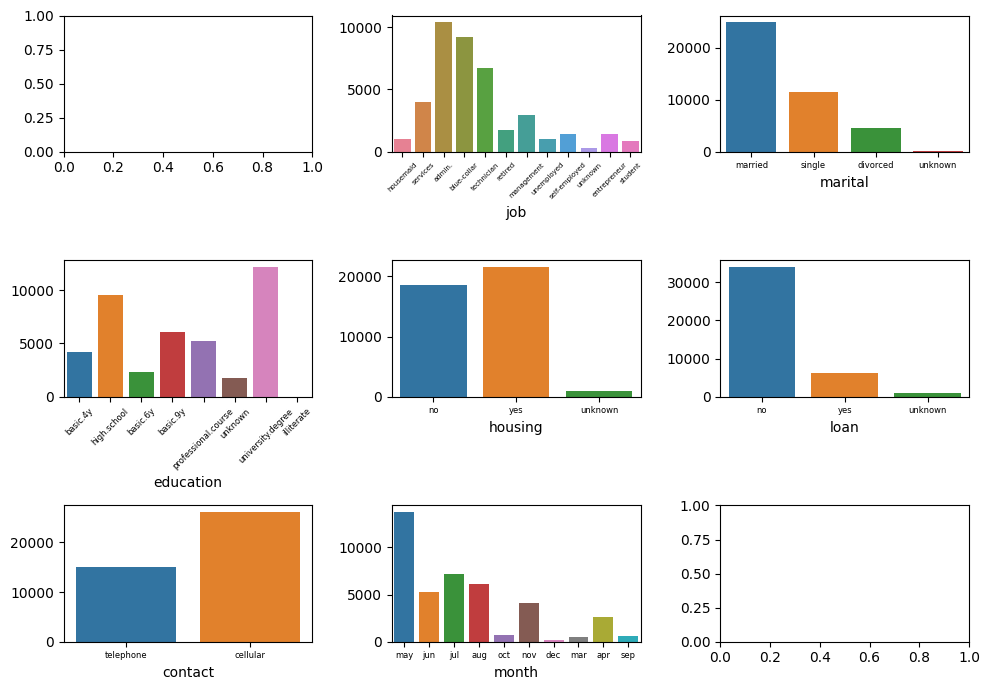

In [13]:
# Graficamos
fig, axis = plt.subplots(3, 3, figsize = (10, 7))

sns.countplot(ax = axis[0,1], data = df_bank, x='job', hue='job').set(ylabel = None)
axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), fontsize='5', rotation=45) 


sns.countplot(ax = axis[0,2], data = df_bank, x = "marital", hue='marital').set(ylabel = None)
axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), fontsize='6') 

sns.countplot(ax = axis[1,0], data = df_bank, x = "education", hue='education').set(ylabel = None)
axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), fontsize='6', rotation=45) 

sns.countplot(ax = axis[1,1], data = df_bank, x = "housing", hue='housing').set(ylabel = None)
axis[1,1].set_xticklabels(axis[1,1].get_xticklabels(), fontsize='6') 

sns.countplot(ax = axis[1,2], data = df_bank, x = "loan", hue='loan').set(ylabel = None)
axis[1,2].set_xticklabels(axis[1,2].get_xticklabels(), fontsize='6') 

sns.countplot(ax = axis[2,0], data = df_bank, x = "contact", hue='contact').set(ylabel = None)
axis[2,0].set_xticklabels(axis[2,0].get_xticklabels(), fontsize='6') 

sns.countplot(ax = axis[2,1], data = df_bank, x = "month", hue='month').set(ylabel = None)
axis[2,1].set_xticklabels(axis[2,1].get_xticklabels(), fontsize='6') 


plt.tight_layout()

plt.show()

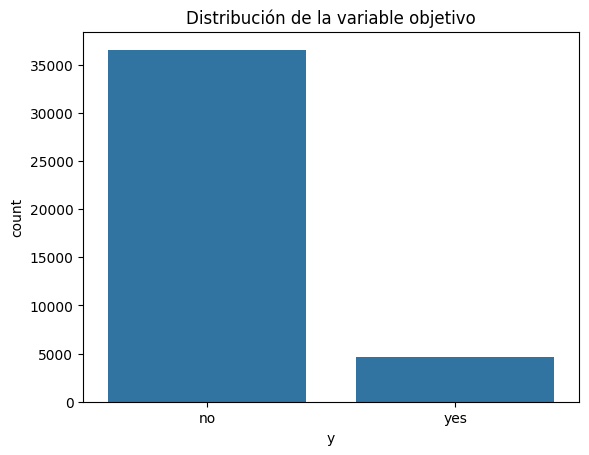

In [14]:
# Distribución de la variable objetivo
sns.countplot(x='y', data=df_bank)
plt.title('Distribución de la variable objetivo')
plt.show()

El análisis por cada variable muestra la siguiente información:

* job: Las profesiones se inclinan hacia admin. 10419, blue-collar 9253 y technician 6739.
* marital: Predomina la categoria married con 60% de los datos.
* education: Predominan las personas con university.degree y high.school, ambos representan un 53%. 
* housing: Predomina la etiqueta 'yes' con 52% de los valores.
* loan: Predomina La etiqueta 'no' con 82% de los datos.
* contact: Predomina el celular como medio de contacto con el cliente, con 63% de los valores.
* month: Mayo predomina como ultimo mes de contacto con el cliente, con un valor de 33% de los datos.
* y: Esta variable representa la clase u objetivo, tipo categorica y predomina la etiqueta 'no', representando el 89% de los valores. Etiqueta 'yes' con 11%. 

Variables Numéricas

In [16]:
s = (df_bank.dtypes == 'int64')
s1=(df_bank.dtypes == 'float64')
object_colums = list(s[s].index)
object_colums1=list(s1[s1].index)
print("Numerical variables:")
print(object_colums,object_colums1)

Numerical variables:
['age', 'duration', 'campaign', 'pdays', 'previous'] ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [17]:
df_bank['euribor3m'].describe()

count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [18]:
df_bank['cons.conf.idx'].describe()

count    41176.000000
mean       -40.502863
std          4.627860
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [19]:
df_bank['emp.var.rate'].describe()


count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

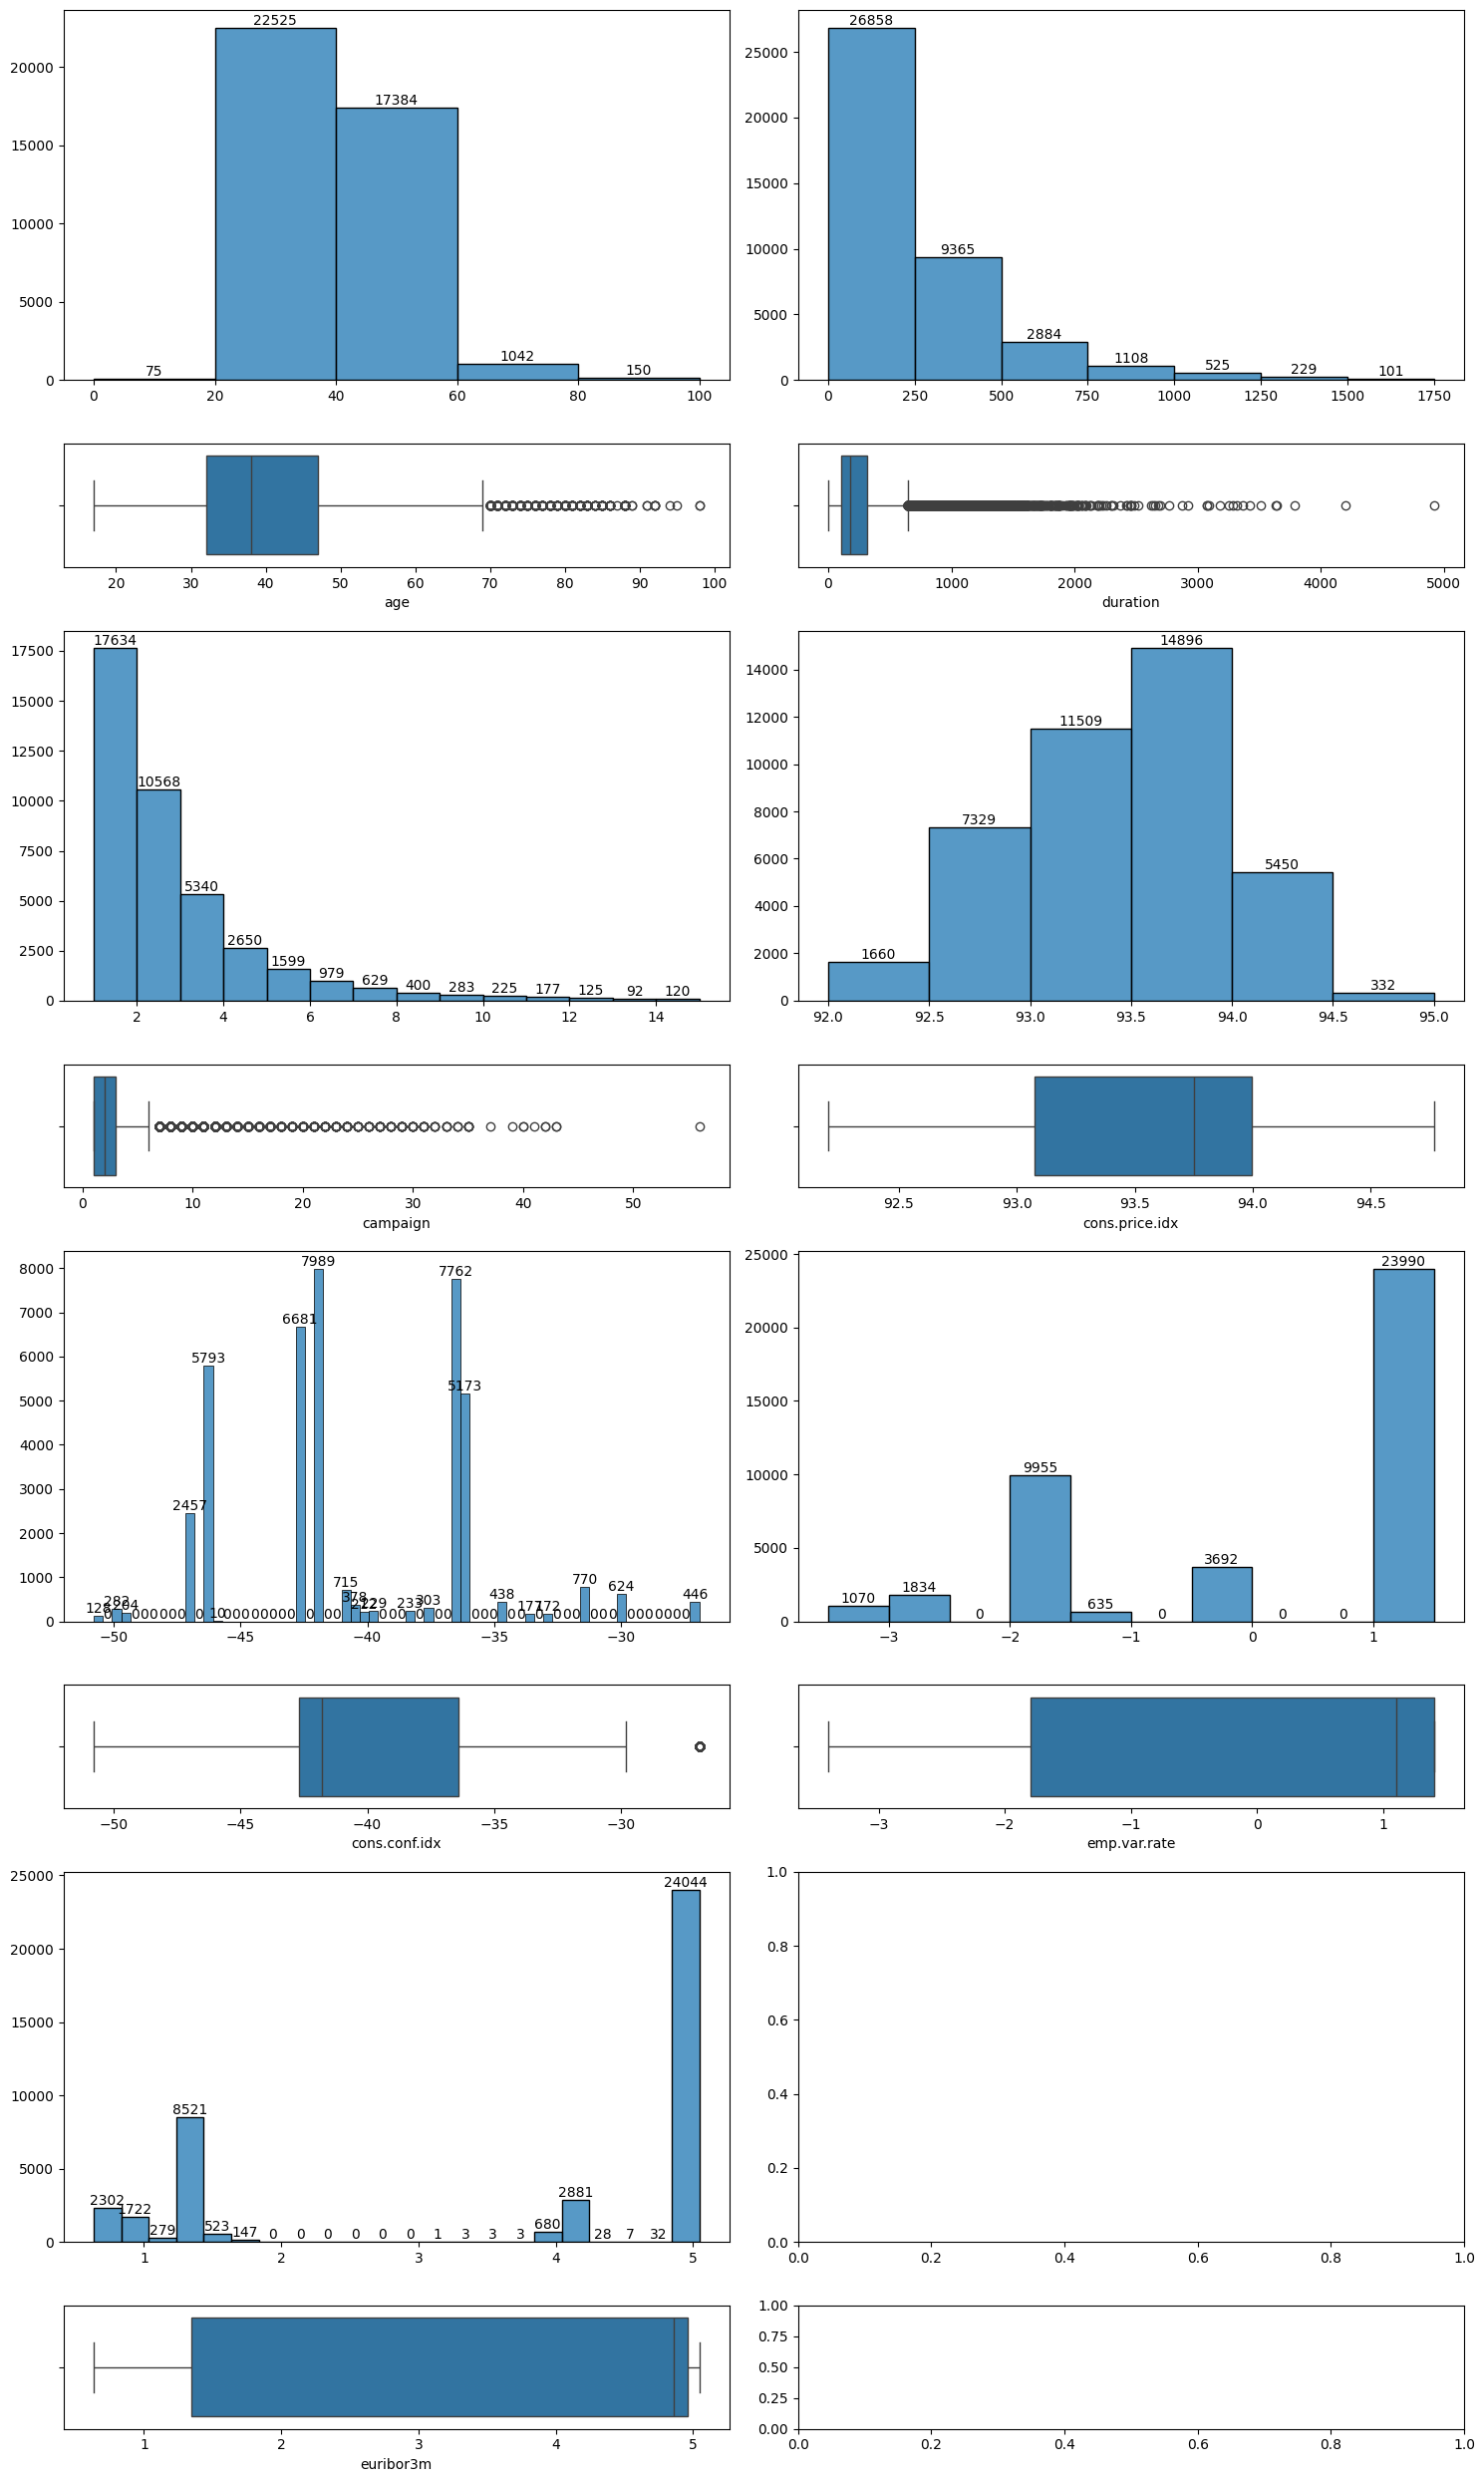

In [20]:
# Graficamos
fig, axis = plt.subplots(8, 2, figsize = (15, 25), gridspec_kw={'height_ratios': [6,2,6,2,6,2,6,2]})

# histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_bank, x = "age",bins=(0,20,40,60,80,100)).set(xlabel = None, ylabel = None)
axis[0,0].bar_label(axis[0,0].containers[0])
sns.boxplot(ax = axis[1, 0], data = df_bank, x = "age")

bin_edges = [0, 250, 500, 750, 1000, 1250,1500,1750, float('inf')]
sns.histplot(ax = axis[0, 1], data = df_bank, x = "duration", bins=bin_edges).set(xlabel = None, ylabel = None)
axis[0,1].bar_label(axis[0,1].containers[0])
sns.boxplot(ax = axis[1, 1], data = df_bank, x = "duration")


sns.histplot(ax = axis[2, 0], data = df_bank, x = "campaign",bins=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)).set(xlabel = None, ylabel = None)
axis[2,0].bar_label(axis[2,0].containers[0])
sns.boxplot(ax = axis[3, 0], data = df_bank, x = "campaign")

sns.histplot(ax = axis[2, 1], data = df_bank, x = "cons.price.idx",bins=(92,92.5,93,93.5,94,94.5,95)).set(xlabel = None, ylabel = None)
axis[2,1].bar_label(axis[2,1].containers[0])
sns.boxplot(ax = axis[3, 1], data = df_bank, x = "cons.price.idx")

sns.histplot(ax = axis[4, 0], data = df_bank, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
axis[4,0].bar_label(axis[4,0].containers[0])
sns.boxplot(ax = axis[5, 0], data = df_bank, x = "cons.conf.idx")

sns.histplot(ax = axis[4, 1], data = df_bank, x = "emp.var.rate",bins=(-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5)).set(xlabel = None, ylabel = None)
axis[4,1].bar_label(axis[4,1].containers[0])
sns.boxplot(ax = axis[5, 1], data = df_bank, x = "emp.var.rate")

sns.histplot(ax = axis[6, 0], data = df_bank, x = "euribor3m").set(xlabel = None, ylabel = None)
axis[6,0].bar_label(axis[6,0].containers[0])
sns.boxplot(ax = axis[7, 0], data = df_bank, x = "euribor3m")

plt.tight_layout()

plt.show()

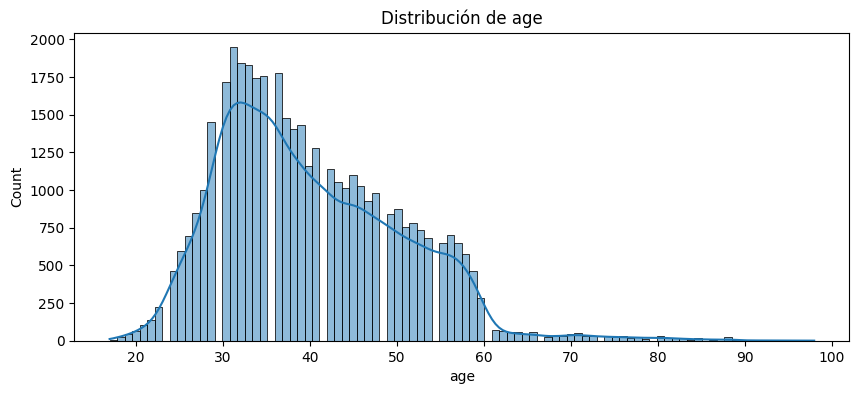

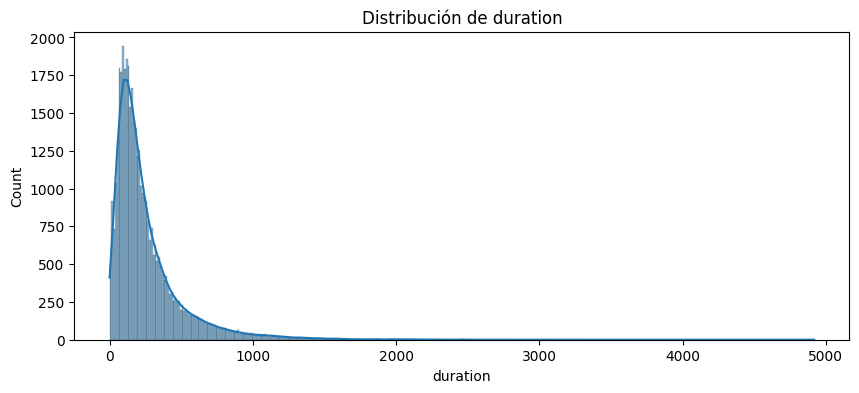

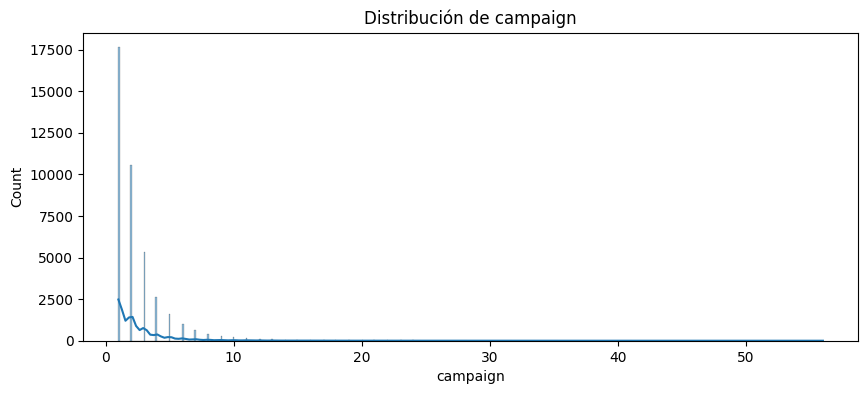

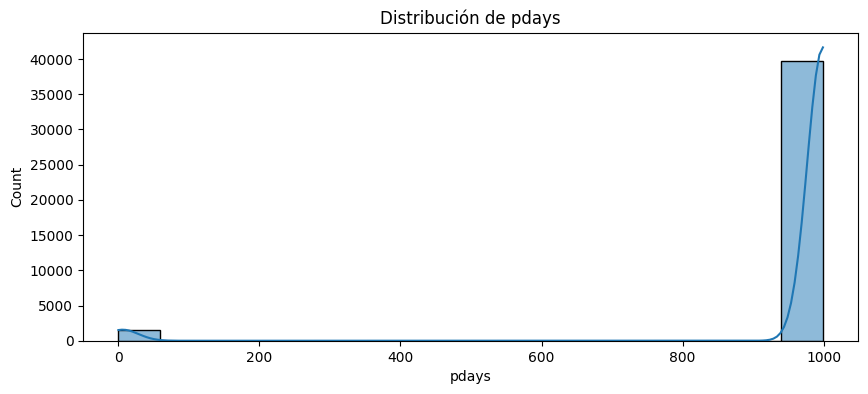

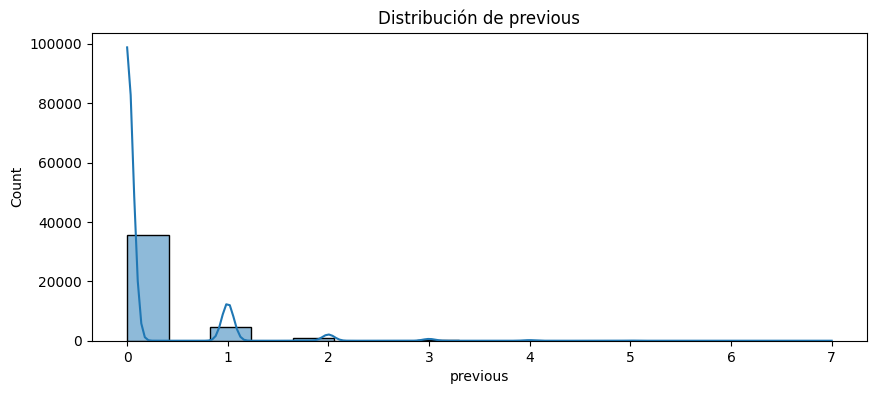

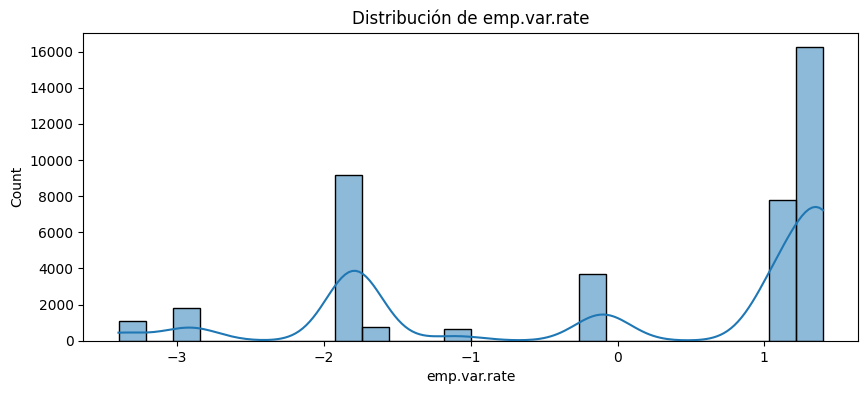

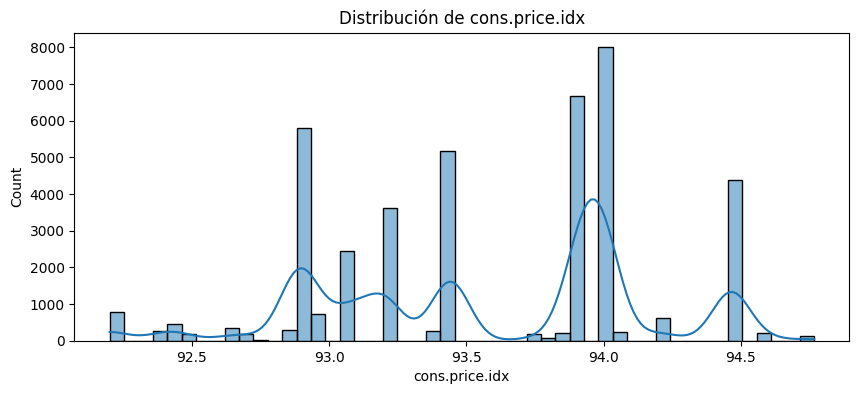

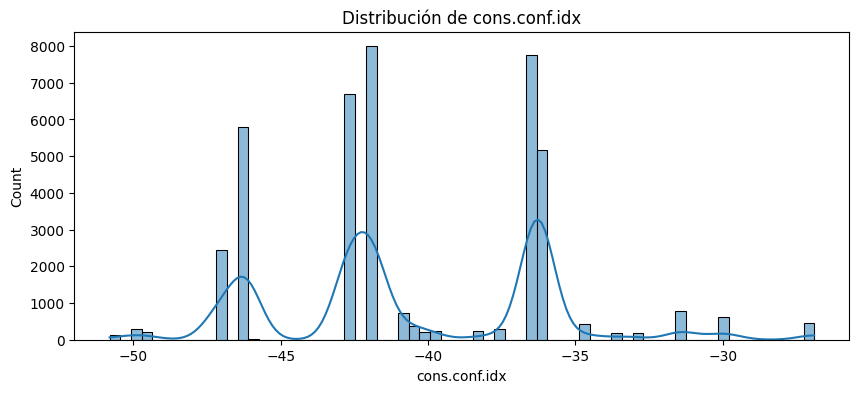

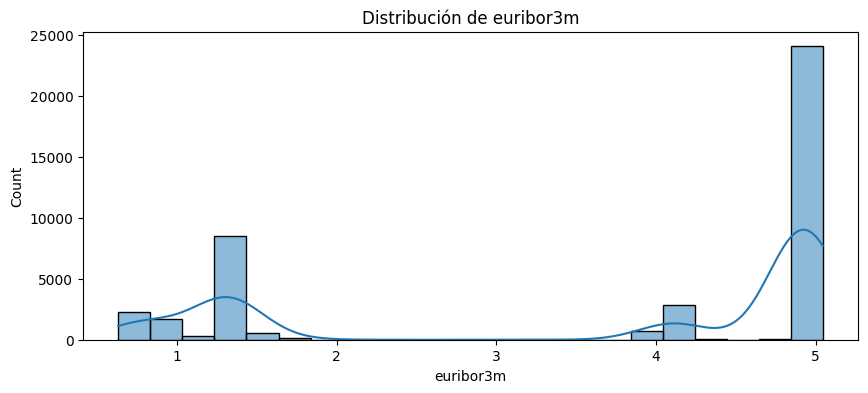

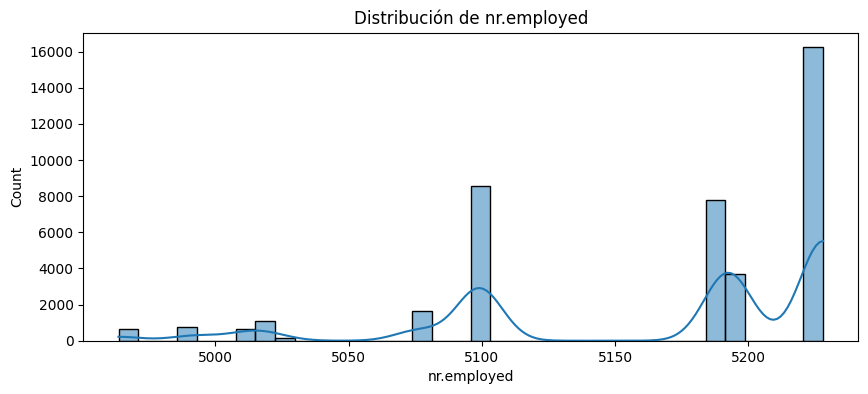

In [21]:
# Análisis de variables numéricas
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_bank[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.show()

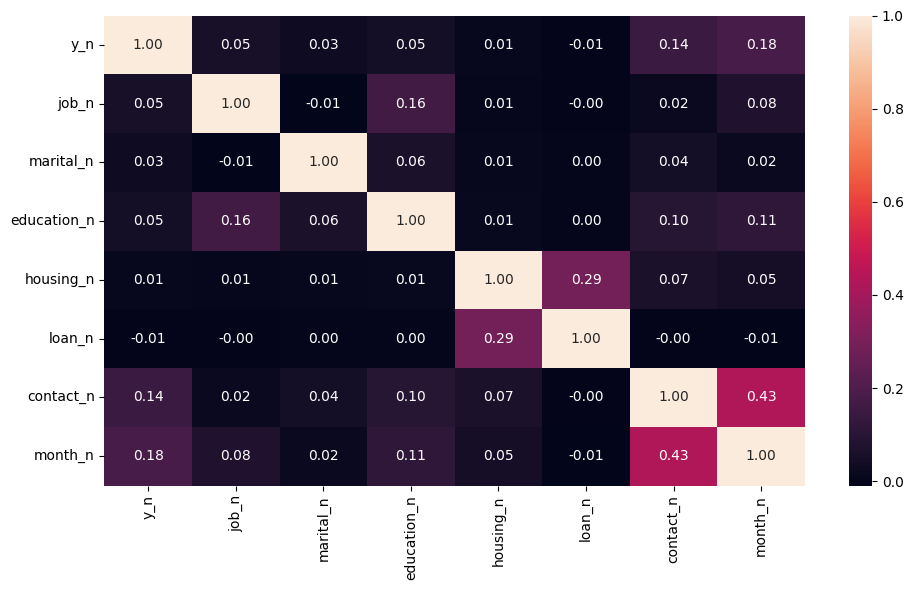

In [25]:
# Matriz Correlacion

#job marital education housing loan contact month y 
df_bank["y_n"] = pd.factorize(df_bank["y"])[0]
df_bank["job_n"] = pd.factorize(df_bank["job"])[0]
df_bank["marital_n"] = pd.factorize(df_bank["marital"])[0]
df_bank["education_n"] = pd.factorize(df_bank["education"])[0]
df_bank["housing_n"] = pd.factorize(df_bank["housing"])[0]
df_bank["loan_n"] = pd.factorize(df_bank["loan"])[0]
df_bank["contact_n"] = pd.factorize(df_bank["contact"])[0]
df_bank["month_n"] = pd.factorize(df_bank["month"])[0]

fig, axis = plt.subplots(figsize = (10, 6))
matriz_corr=df_bank[['y_n','job_n','marital_n', 'education_n', 'housing_n', 'loan_n', 'contact_n', 'month_n']].corr()

#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

La variable que mas se relaciona con la clase y, es duration, con una correlacion de 0.41. En relacion a las otras variables, existe una correlacion negativa con emp.var.rate de -0.30 y con euribor3m de -0.31. El resto de las correlaciones son muy bajas.

Se observa una relacion buena entre 

# Paso 4: Ingeniería de Características

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separar características y variable objetivo
X = df_bank.drop('y', axis=1)
y = df_bank['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Preprocesamiento de características categóricas
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Preprocesamiento para variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesamiento para variables numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocesamiento completo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresion Logistica

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear el pipeline completo con el modelo de regresión logística
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7067  198]
 [ 576  395]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.67      0.41      0.51       971

    accuracy                           0.91      8236
   macro avg       0.80      0.69      0.73      8236
weighted avg       0.89      0.91      0.90      8236



# Optimizacion del Modelo

In [29]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros a buscar
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularización
    'classifier__solver': ['liblinear', 'saga']  # Solvers
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Ajustar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores Parámetros Encontrados:")
print(grid_search.best_params_)

# Hacer predicciones con el mejor modelo
y_pred_optimized = grid_search.best_estimator_.predict(X_test)

# Evaluar el modelo optimizado
print("\nConfusion Matrix (Optimizado):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimizado):")
print(classification_report(y_test, y_pred_optimized))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores Parámetros Encontrados:
{'classifier__C': 0.1, 'classifier__solver': 'liblinear'}

Confusion Matrix (Optimizado):
[[7069  196]
 [ 579  392]]

Classification Report (Optimizado):
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.67      0.40      0.50       971

    accuracy                           0.91      8236
   macro avg       0.80      0.69      0.73      8236
weighted avg       0.89      0.91      0.90      8236

